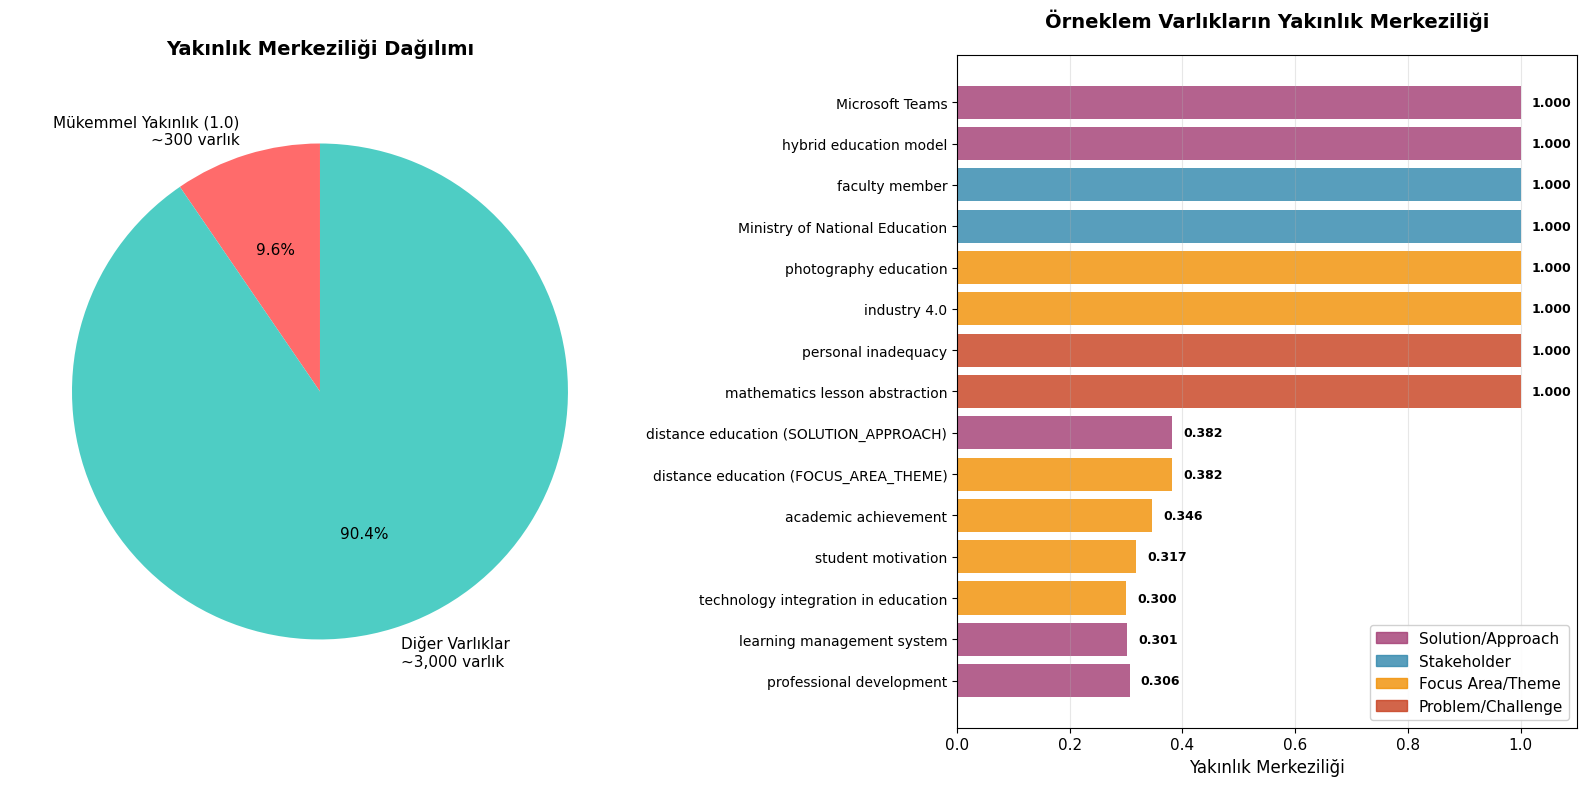

=== YAKINLIK MERKEZİLİĞİ ÖZETİ ===
Mükemmel yakınlık (1.0) sahip varlık sayısı: ~300
Distance education yakınlık merkeziliği: 0.382
En düşük yakınlık değeri örneklemde: 0.300


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Türkçe karakter desteği
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 11

# En yüksek yakınlık merkeziliği verisi (1.0 değerine sahip varlıkların bir kısmı)
# Çok fazla varlık 1.0 değerine sahip olduğu için, çeşitliliği gösteren bir örneklem seçelim
top_closeness_data = [
    {"name": "Microsoft Teams", "entity_type": "SOLUTION_APPROACH", "closeness_centrality": 1.0, "degree_centrality": 2.0},
    {"name": "hybrid education model", "entity_type": "SOLUTION_APPROACH", "closeness_centrality": 1.0, "degree_centrality": 13.0},
    {"name": "faculty member", "entity_type": "STAKEHOLDER", "closeness_centrality": 1.0, "degree_centrality": 68.0},
    {"name": "Ministry of National Education", "entity_type": "STAKEHOLDER", "closeness_centrality": 1.0, "degree_centrality": 17.0},
    {"name": "photography education", "entity_type": "FOCUS_AREA_THEME", "closeness_centrality": 1.0, "degree_centrality": 2.0},
    {"name": "industry 4.0", "entity_type": "FOCUS_AREA_THEME", "closeness_centrality": 1.0, "degree_centrality": 0.0},
    {"name": "personal inadequacy", "entity_type": "PROBLEM_CHALLENGE", "closeness_centrality": 1.0, "degree_centrality": 0.0},
    {"name": "mathematics lesson abstraction", "entity_type": "PROBLEM_CHALLENGE", "closeness_centrality": 1.0, "degree_centrality": 0.0},
    {"name": "distance education", "entity_type": "SOLUTION_APPROACH", "closeness_centrality": 0.382, "degree_centrality": 572.0},
    {"name": "distance education", "entity_type": "FOCUS_AREA_THEME", "closeness_centrality": 0.382, "degree_centrality": 572.0},
    {"name": "academic achievement", "entity_type": "FOCUS_AREA_THEME", "closeness_centrality": 0.346, "degree_centrality": 5.0},
    {"name": "student motivation", "entity_type": "FOCUS_AREA_THEME", "closeness_centrality": 0.317, "degree_centrality": 0.0},
    {"name": "technology integration in education", "entity_type": "FOCUS_AREA_THEME", "closeness_centrality": 0.300, "degree_centrality": 27.0},
    {"name": "learning management system", "entity_type": "SOLUTION_APPROACH", "closeness_centrality": 0.301, "degree_centrality": 41.0},
    {"name": "professional development", "entity_type": "SOLUTION_APPROACH", "closeness_centrality": 0.306, "degree_centrality": 0.0}
]

# Renk paleti - entity türlerine göre
colors = {'STAKEHOLDER': '#2E86AB', 'SOLUTION_APPROACH': '#A23B72', 
          'FOCUS_AREA_THEME': '#F18F01', 'PROBLEM_CHALLENGE': '#C73E1D'}

# DataFrame oluştur
df_closeness = pd.DataFrame(top_closeness_data)

# Figure oluşturma - iki farklı yaklaşım
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# 1. Perfect closeness (1.0) vs Others
perfect_closeness = df_closeness[df_closeness['closeness_centrality'] == 1.0]
other_closeness = df_closeness[df_closeness['closeness_centrality'] < 1.0]

# Pie chart: Perfect vs Non-perfect closeness distribution
perfect_count = len(perfect_closeness)
other_count = len(other_closeness)
total_perfect = 300  # Yaklaşık olarak, çünkü çok sayıda varlık 1.0 değerine sahip

labels = [f'Mükemmel Yakınlık (1.0)\n~300 varlık', f'Diğer Varlıklar\n~3,000 varlık']
sizes = [total_perfect, 3140 - total_perfect]
colors_pie = ['#FF6B6B', '#4ECDC4']

wedges, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.1f%%', 
                                   colors=colors_pie, startangle=90,
                                   textprops={'fontsize': 11})

ax1.set_title('Yakınlık Merkeziliği Dağılımı', fontsize=14, fontweight='bold', pad=20)

# 2. Sample entities visualization
entity_colors = [colors[entity_type] for entity_type in df_closeness['entity_type']]

# Horizontal bar chart
bars = ax2.barh(range(len(df_closeness)), df_closeness['closeness_centrality'],
                color=entity_colors, alpha=0.8)

# Y eksen etiketleri
y_labels = []
for _, row in df_closeness.iterrows():
    if row['name'] == 'distance education':
        label = f"{row['name']} ({row['entity_type']})"
    else:
        label = row['name']
    y_labels.append(label)

ax2.set_yticks(range(len(df_closeness)))
ax2.set_yticklabels(y_labels, fontsize=10)
ax2.set_xlabel('Yakınlık Merkeziliği', fontsize=12)
ax2.set_title('Örneklem Varlıkların Yakınlık Merkeziliği', fontsize=14, fontweight='bold', pad=20)
ax2.grid(axis='x', alpha=0.3)

# Değerleri çubukların yanına yazma
for i, (bar, value) in enumerate(zip(bars, df_closeness['closeness_centrality'])):
    width = bar.get_width()
    ax2.text(width + 0.02, bar.get_y() + bar.get_height()/2,
             f'{value:.3f}',
             ha='left', va='center', fontweight='bold', fontsize=9)

ax2.set_xlim(0, 1.1)

# Legend için entity türlerini göster
legend_labels = {'STAKEHOLDER': 'Stakeholder', 'SOLUTION_APPROACH': 'Solution/Approach', 
                'FOCUS_AREA_THEME': 'Focus Area/Theme', 'PROBLEM_CHALLENGE': 'Problem/Challenge'}
legend_elements = [plt.Rectangle((0,0),1,1, color=colors[entity], alpha=0.8, label=legend_labels[entity]) 
                  for entity in df_closeness['entity_type'].unique()]
ax2.legend(handles=legend_elements, loc='lower right', framealpha=0.9)

# Invert y-axis
ax2.invert_yaxis()
#savefig
plt.savefig('5.2.6.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

# Özet istatistikler
print("=== YAKINLIK MERKEZİLİĞİ ÖZETİ ===")
print(f"Mükemmel yakınlık (1.0) sahip varlık sayısı: ~300")
print(f"Distance education yakınlık merkeziliği: {df_closeness[df_closeness['name']=='distance education'].iloc[0]['closeness_centrality']:.3f}")
print(f"En düşük yakınlık değeri örneklemde: {df_closeness['closeness_centrality'].min():.3f}")


/tmp/ipykernel_878102/4183193090.py:100: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax4.boxplot(simulated_data, labels=labels, patch_artist=True)


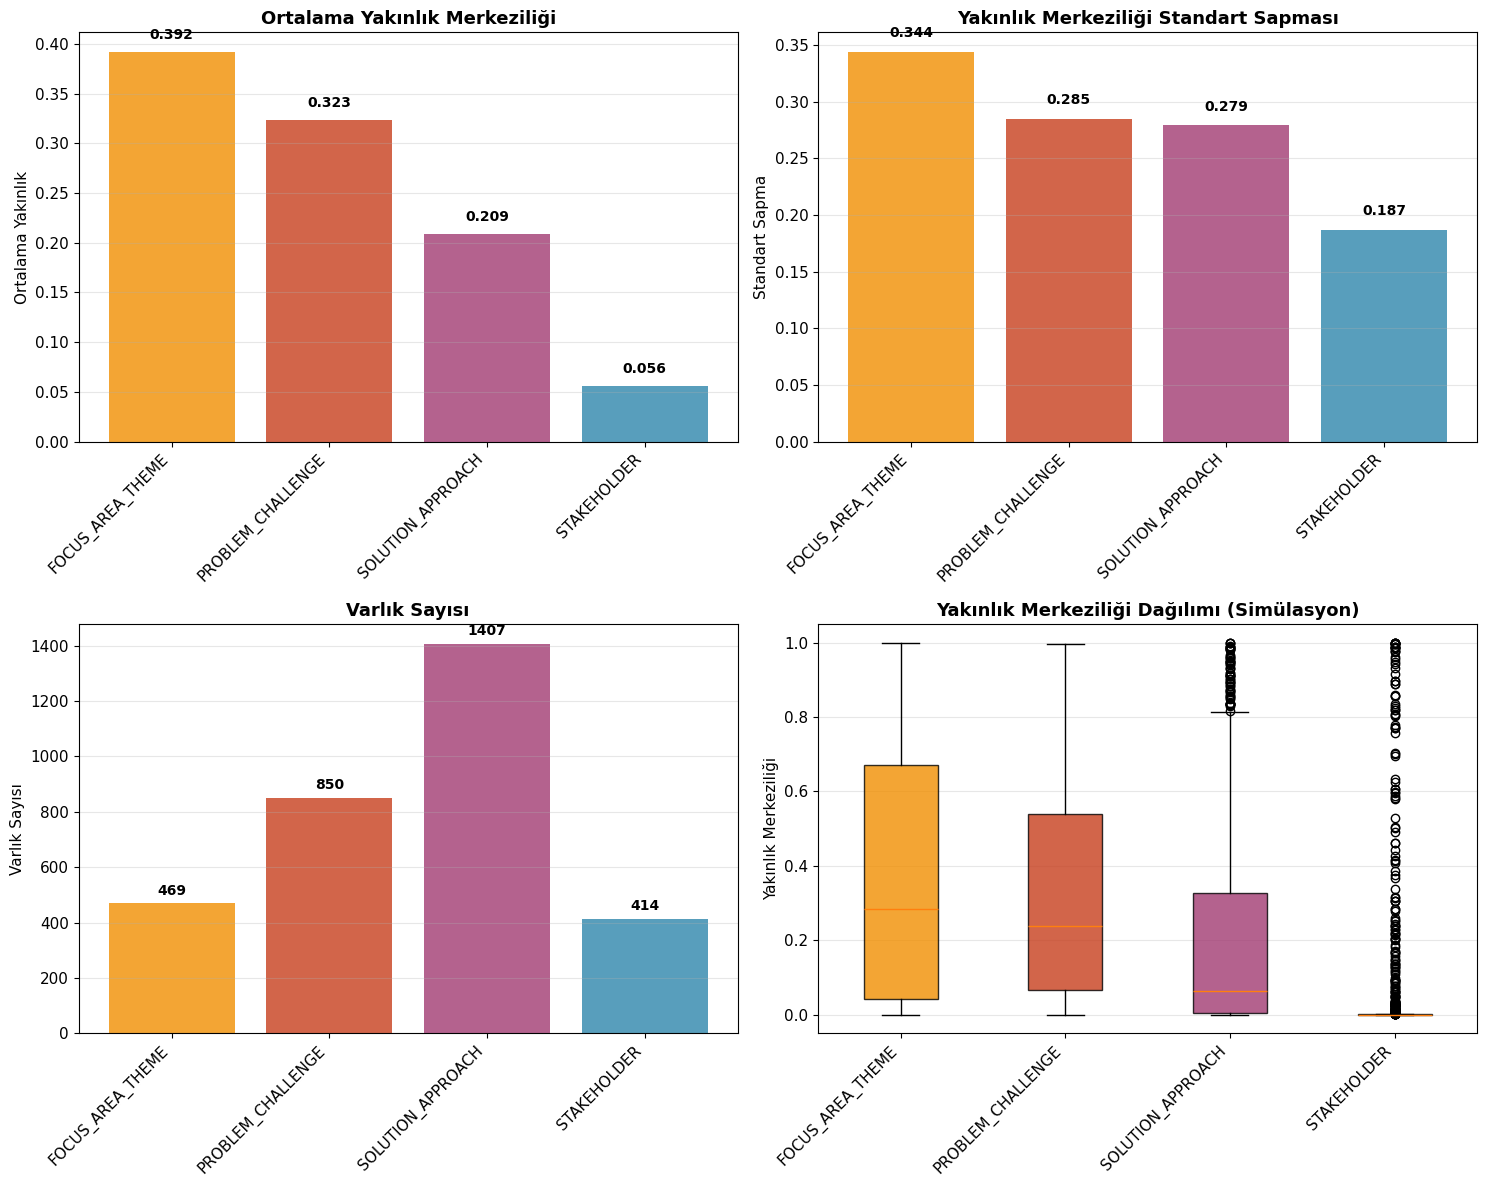

=== VARLıK TÜRLERİNE GÖRE YAKINLIK MERKEZİLİĞİ İSTATİSTİKLERİ ===
Varlık Türü          Sayı     Ort.     Min.     Maks.    Std.    
-----------------------------------------------------------------
FOCUS_AREA_THEME     469      0.392    0.0      1.0      0.344   
PROBLEM_CHALLENGE    850      0.323    0.0      1.0      0.285   
SOLUTION_APPROACH    1407     0.209    0.0      1.0      0.279   
STAKEHOLDER          414      0.056    0.0      1.0      0.187   


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Türkçe karakter desteği
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 11

# Varlık türlerine göre yakınlık merkeziliği istatistikleri
closeness_stats_data = [
    {"entity_type": "FOCUS_AREA_THEME", "node_count": 469, "avg_closeness": 0.392, "min_closeness": 0.0, "max_closeness": 1.0, "stdev_closeness": 0.344},
    {"entity_type": "PROBLEM_CHALLENGE", "node_count": 850, "avg_closeness": 0.323, "min_closeness": 0.0, "max_closeness": 1.0, "stdev_closeness": 0.285},
    {"entity_type": "SOLUTION_APPROACH", "node_count": 1407, "avg_closeness": 0.209, "min_closeness": 0.0, "max_closeness": 1.0, "stdev_closeness": 0.279},
    {"entity_type": "STAKEHOLDER", "node_count": 414, "avg_closeness": 0.056, "min_closeness": 0.0, "max_closeness": 1.0, "stdev_closeness": 0.187}
]

# DataFrame oluştur
df_stats = pd.DataFrame(closeness_stats_data)

# Renk paleti
colors = ['#F18F01', '#C73E1D', '#A23B72', '#2E86AB']

# Alt grafik oluşturma
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Ortalama yakınlık merkeziliği
bars1 = ax1.bar(df_stats['entity_type'], df_stats['avg_closeness'], 
                color=colors, alpha=0.8)
ax1.set_title('Ortalama Yakınlık Merkeziliği', fontsize=13, fontweight='bold')
ax1.set_ylabel('Ortalama Yakınlık', fontsize=11)
ax1.grid(axis='y', alpha=0.3)

# Değerleri çubukların üzerine yazma
for bar, value in zip(bars1, df_stats['avg_closeness']):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{value:.3f}',
             ha='center', va='bottom', fontweight='bold', fontsize=10)

# 2. Standart sapma
bars2 = ax2.bar(df_stats['entity_type'], df_stats['stdev_closeness'], 
                color=colors, alpha=0.8)
ax2.set_title('Yakınlık Merkeziliği Standart Sapması', fontsize=13, fontweight='bold')
ax2.set_ylabel('Standart Sapma', fontsize=11)
ax2.grid(axis='y', alpha=0.3)

# Değerleri çubukların üzerine yazma
for bar, value in zip(bars2, df_stats['stdev_closeness']):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{value:.3f}',
             ha='center', va='bottom', fontweight='bold', fontsize=10)

# 3. Varlık sayısı
bars3 = ax3.bar(df_stats['entity_type'], df_stats['node_count'], 
                color=colors, alpha=0.8)
ax3.set_title('Varlık Sayısı', fontsize=13, fontweight='bold')
ax3.set_ylabel('Varlık Sayısı', fontsize=11)
ax3.grid(axis='y', alpha=0.3)

# Değerleri çubukların üzerine yazma
for bar, value in zip(bars3, df_stats['node_count']):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 20,
             f'{int(value)}',
             ha='center', va='bottom', fontweight='bold', fontsize=10)

# 4. Box plot - yakınlık merkeziliği dağılımı simülasyonu
# Gerçek verileri simüle edelim (normal dağılım varsayımıyla)
np.random.seed(42)
simulated_data = []
labels = []

for _, row in df_stats.iterrows():
    # Beta dağılımı kullanarak 0-1 arasında değerler üretelim
    # Ortalama ve std sapma kullanarak parametreler hesaplayalım
    mean = row['avg_closeness']
    std = row['stdev_closeness']
    
    if mean > 0:
        # Beta dağılımının parametrelerini tahmin et
        var = std**2
        alpha = mean * (mean * (1 - mean) / var - 1)
        beta = (1 - mean) * (mean * (1 - mean) / var - 1)
        
        # Parametreler geçerli değilse normal dağılım kullan ve 0-1 arasına sınırla
        if alpha > 0 and beta > 0:
            data = np.random.beta(alpha, beta, 1000)
        else:
            data = np.random.normal(mean, std, 1000)
            data = np.clip(data, 0, 1)
    else:
        # Çoğu değer 0 ise
        data = np.random.choice([0, 1], 1000, p=[0.9, 0.1])
        
    simulated_data.append(data)
    labels.append(row['entity_type'])

bp = ax4.boxplot(simulated_data, labels=labels, patch_artist=True)

# Renklendirme
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.8)

ax4.set_title('Yakınlık Merkeziliği Dağılımı (Simülasyon)', fontsize=13, fontweight='bold')
ax4.set_ylabel('Yakınlık Merkeziliği', fontsize=11)
ax4.grid(axis='y', alpha=0.3)

# X eksen etiketlerini döndürme
for ax in [ax1, ax2, ax3, ax4]:
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# savefig
plt.savefig('5.2.7.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

# Özet tablo yazdırma
print("=== VARLıK TÜRLERİNE GÖRE YAKINLIK MERKEZİLİĞİ İSTATİSTİKLERİ ===")
print(f"{'Varlık Türü':<20} {'Sayı':<8} {'Ort.':<8} {'Min.':<8} {'Maks.':<8} {'Std.':<8}")
print("-" * 65)
for _, row in df_stats.iterrows():
    print(f"{row['entity_type']:<20} {row['node_count']:<8} "
          f"{row['avg_closeness']:<8.3f} {row['min_closeness']:<8.1f} "
          f"{row['max_closeness']:<8.1f} {row['stdev_closeness']:<8.3f}")


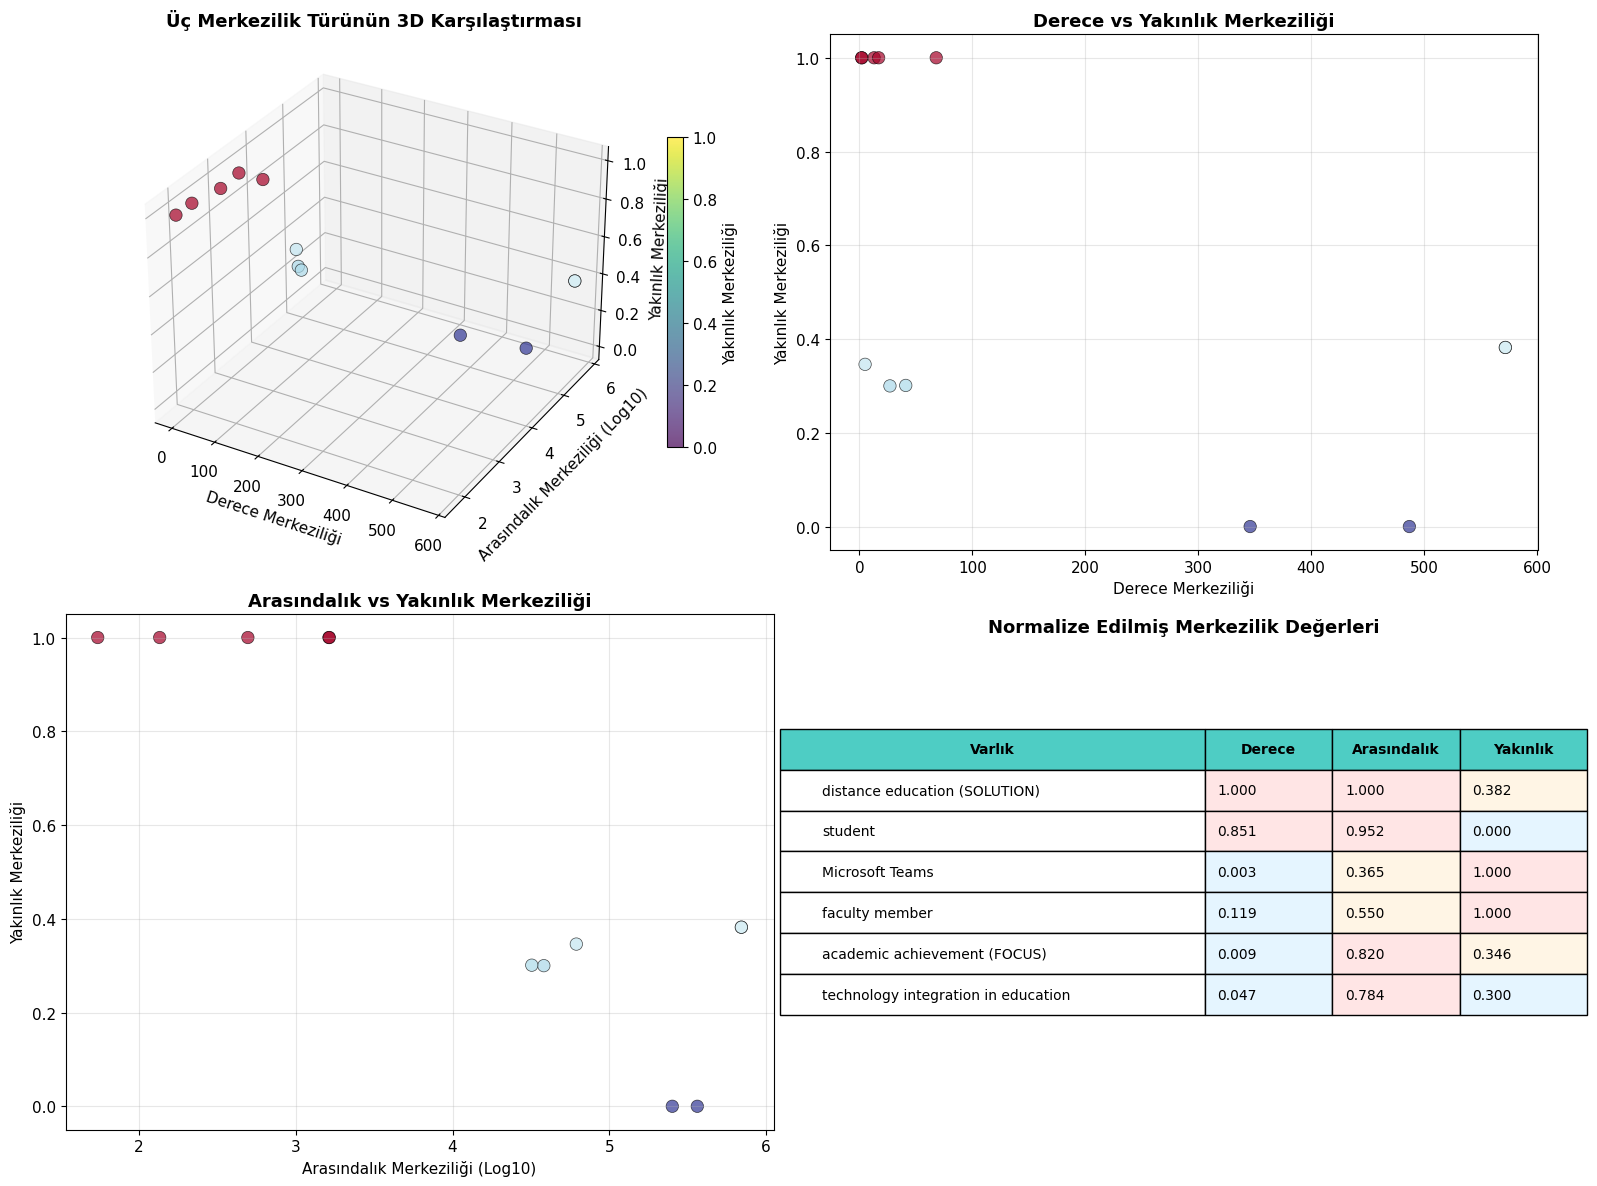

=== ÜÇ MERKEZİLİK TÜRÜ KARŞILAŞTIRMASI ===

En yüksek değerler:
Derece: distance education (SOLUTION) - 572.0
Arasındalık: distance education (SOLUTION) - 697,733
Yakınlık: Microsoft Teams ve diğerleri - 1.0

İlginç bulgular:
- Distance education: Yüksek derece ve arasındalık, düşük yakınlık
- Student/Teacher: Yüksek derece ve arasındalık, sıfır yakınlık
- Microsoft Teams: Düşük derece, orta arasındalık, mükemmel yakınlık


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Türkçe karakter desteği
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 11

# Üç merkezilik türünün karşılaştırması (seçilmiş örnekler)
comparison_data = [
    {"name": "distance education (SOLUTION)", "degree_centrality": 572.0, "betweenness_centrality": 697732.63, "closeness_centrality": 0.382},
    {"name": "distance education (FOCUS)", "degree_centrality": 572.0, "betweenness_centrality": 697732.63, "closeness_centrality": 0.382},
    {"name": "student", "degree_centrality": 487.0, "betweenness_centrality": 365110.15, "closeness_centrality": 0.0},
    {"name": "teacher", "degree_centrality": 346.0, "betweenness_centrality": 252847.64, "closeness_centrality": 0.0},
    {"name": "Microsoft Teams", "degree_centrality": 2.0, "betweenness_centrality": 134.20, "closeness_centrality": 1.0},
    {"name": "hybrid education model", "degree_centrality": 13.0, "betweenness_centrality": 1626.0, "closeness_centrality": 1.0},
    {"name": "faculty member", "degree_centrality": 68.0, "betweenness_centrality": 1634.0, "closeness_centrality": 1.0},
    {"name": "Ministry of National Education", "degree_centrality": 17.0, "betweenness_centrality": 493.13, "closeness_centrality": 1.0},
    {"name": "photography education", "degree_centrality": 2.0, "betweenness_centrality": 53.38, "closeness_centrality": 1.0},
    {"name": "academic achievement (FOCUS)", "degree_centrality": 5.0, "betweenness_centrality": 61696.14, "closeness_centrality": 0.346},
    {"name": "technology integration in education", "degree_centrality": 27.0, "betweenness_centrality": 38263.94, "closeness_centrality": 0.300},
    {"name": "learning management system", "degree_centrality": 41.0, "betweenness_centrality": 32048.16, "closeness_centrality": 0.301}
]

# DataFrame oluştur
df_comparison = pd.DataFrame(comparison_data)

# Figure oluşturma
fig = plt.figure(figsize=(16, 12))

# 3D scatter plot için subplot
ax1 = fig.add_subplot(221, projection='3d')

# Renk kodlaması - yakınlık merkeziliğine göre
colors = plt.cm.RdYlBu_r(df_comparison['closeness_centrality'])

# 3D scatter plot
scatter = ax1.scatter(df_comparison['degree_centrality'], 
                     np.log10(df_comparison['betweenness_centrality'] + 1),
                     df_comparison['closeness_centrality'],
                     c=colors, s=80, alpha=0.7, edgecolors='black', linewidth=0.5)

ax1.set_xlabel('Derece Merkeziliği', fontsize=11)
ax1.set_ylabel('Arasındalık Merkeziliği (Log10)', fontsize=11)
ax1.set_zlabel('Yakınlık Merkeziliği', fontsize=11)
ax1.set_title('Üç Merkezilik Türünün 3D Karşılaştırması', fontsize=13, fontweight='bold')

# Colorbar ekle
cbar = plt.colorbar(scatter, ax=ax1, shrink=0.6)
cbar.set_label('Yakınlık Merkeziliği', fontsize=11)

# 2D projeksiyonlar
# Derece vs Yakınlık
ax2 = fig.add_subplot(222)
scatter2 = ax2.scatter(df_comparison['degree_centrality'], 
                      df_comparison['closeness_centrality'],
                      c=colors, s=80, alpha=0.7, edgecolors='black', linewidth=0.5)

ax2.set_xlabel('Derece Merkeziliği', fontsize=11)
ax2.set_ylabel('Yakınlık Merkeziliği', fontsize=11)
ax2.set_title('Derece vs Yakınlık Merkeziliği', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Arasındalık vs Yakınlık
ax3 = fig.add_subplot(223)
scatter3 = ax3.scatter(np.log10(df_comparison['betweenness_centrality'] + 1), 
                      df_comparison['closeness_centrality'],
                      c=colors, s=80, alpha=0.7, edgecolors='black', linewidth=0.5)

ax3.set_xlabel('Arasındalık Merkeziliği (Log10)', fontsize=11)
ax3.set_ylabel('Yakınlık Merkeziliği', fontsize=11)
ax3.set_title('Arasındalık vs Yakınlık Merkeziliği', fontsize=13, fontweight='bold')
ax3.grid(True, alpha=0.3)

# Merkezilik türleri karşılaştırma tablosu
ax4 = fig.add_subplot(224)
ax4.axis('off')

# Normalized değerler için tablo oluştur
df_norm = df_comparison.copy()
df_norm['degree_norm'] = df_norm['degree_centrality'] / df_norm['degree_centrality'].max()
df_norm['betweenness_norm'] = (np.log10(df_norm['betweenness_centrality'] + 1) / 
                               np.log10(df_norm['betweenness_centrality'].max() + 1))
df_norm['closeness_norm'] = df_norm['closeness_centrality']

# En ilginç 6 varlığı seç
interesting_entities = [
    "distance education (SOLUTION)",
    "student", 
    "Microsoft Teams",
    "faculty member",
    "academic achievement (FOCUS)",
    "technology integration in education"
]

table_data = []
for entity in interesting_entities:
    row = df_norm[df_norm['name'] == entity].iloc[0]
    table_data.append([
        entity,
        f"{row['degree_norm']:.3f}",
        f"{row['betweenness_norm']:.3f}",
        f"{row['closeness_norm']:.3f}"
    ])

table = ax4.table(cellText=table_data,
                 colLabels=['Varlık', 'Derece', 'Arasındalık', 'Yakınlık'],
                 cellLoc='left',
                 loc='center',
                 colWidths=[0.5, 0.15, 0.15, 0.15])

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 2)

# Header styling
for i in range(4):
    table[(0, i)].set_facecolor('#4ECDC4')
    table[(0, i)].set_text_props(weight='bold')

# Cell colors based on values
for i in range(1, len(table_data) + 1):
    for j in range(1, 4):
        value = float(table_data[i-1][j])
        if value > 0.7:
            table[(i, j)].set_facecolor('#FFE5E5')
        elif value > 0.3:
            table[(i, j)].set_facecolor('#FFF5E5')
        else:
            table[(i, j)].set_facecolor('#E5F5FF')

ax4.set_title('Normalize Edilmiş Merkezilik Değerleri', fontsize=13, fontweight='bold', y=0.95)

#savefig
plt.savefig('5.2.8.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

# Özet analiz
print("=== ÜÇ MERKEZİLİK TÜRÜ KARŞILAŞTIRMASI ===")
print("\nEn yüksek değerler:")
print(f"Derece: {df_comparison.loc[df_comparison['degree_centrality'].idxmax(), 'name']} - {df_comparison['degree_centrality'].max()}")
print(f"Arasındalık: {df_comparison.loc[df_comparison['betweenness_centrality'].idxmax(), 'name']} - {df_comparison['betweenness_centrality'].max():,.0f}")
print(f"Yakınlık: Microsoft Teams ve diğerleri - 1.0")

print("\nİlginç bulgular:")
print("- Distance education: Yüksek derece ve arasındalık, düşük yakınlık")
print("- Student/Teacher: Yüksek derece ve arasındalık, sıfır yakınlık")  
print("- Microsoft Teams: Düşük derece, orta arasındalık, mükemmel yakınlık")
